In [18]:
%matplotlib inline
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance

plt.style.use("seaborn-talk")

In [2]:
# plt.style.use("seaborn")
# plt.style.available

In [3]:
# features_predictoras=features_x
# features_criterio=features_y
# predict_name=y_list[22] #17-25

params = {'n_estimators': 300,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

def feature_importance(features_predictoras,features_criterio,predict_name, view_plot=True):

    X_train, X_test, y_train, y_test = train_test_split(
        features_predictoras, 
        features_criterio[predict_name],
        test_size=0.25, 
        random_state=183)

    reg = ensemble.GradientBoostingRegressor(**params)
    reg.fit(X_train, y_train)

    result = permutation_importance(reg, X_test, y_test, n_repeats=250,
                                    random_state=183, n_jobs=-1)
    if view_plot:
        sorted_idx = result.importances_mean.argsort()
        sorted_idx = sorted_idx[-15:]
        plt.figure(figsize=(8, 8))
        plt.boxplot(result.importances[sorted_idx].T,
                    vert=False, labels=np.array(features_predictoras.columns)[sorted_idx])

        plt.title("Permutation Importance (test set) "+predict_name)

    return pd.DataFrame({predict_name+"_importance_mean":result.importances_mean}, index=features_predictoras.columns)

In [4]:
# datos=pd.read_csv("datos_preprocesados.csv", index_col=0)
datos=pd.read_csv("datos_out_punts.csv", index_col=0)

In [5]:
datos.ebc_fecha=pd.to_datetime(datos.ebc_fecha)

In [6]:
y_list=["ebc_humor", "ebc_relax","ebc_energia", "ebc_levantado","ebc_interesantes",#4
        "ebc_nervioso","ebc_preocupacion","ebc_tranquilo", "ebc_desagradable", "ebc_inquieto", "ebc_temor",#10
        "escala_bienestar","escala_HADS",'centil_bienestar','centil_HADS', 'z_bienestar', 'z_HADS',#16
        "discret_bienestar","discret_HADS", 'flag_bienestar_z','flag_HADS_z', #20
        'flag_bienestar', 'flag_HADS',"flag_discret", "flag_z", #24
        'flag_warning']#25

In [7]:
datos_x=datos.drop(y_list,axis="columns")
datos_y=datos[y_list]
print(datos_x.columns)
print(datos_y.columns)

Index(['ebc_dirip', 'ebc_genero', 'ebc_anios', 'ebc_neducativo',
       'ebc_socupacional', 'ebc_hortrabajo', 'ebc_horestudio',
       'ebc_perdioempleo', 'ebc_expuestoempleo', 'ebc_epareja', 'ebc_ninos',
       'ebc_cuantosninos', 'ebc_adultos', 'ebc_cuantosadultos',
       'ebc_situacion_0', 'ebc_animo', 'ebc_agresivo', 'ebc_r_viven',
       'ebc_r_noviven', 'ebc_ruttrabajo', 'ebc_actfisica', 'ebc_actlectura',
       'ebc_actrecreacion', 'ebc_actotra', 'ebc_cual_rut', 'ebc_habilidad',
       'ebc_cualhabilidad', 'ebc_aprendio', 'ebc_queaprendio', 'ebc_bebia',
       'ebc_alcohol', 'ebc_fumaba', 'ebc_tabaco', 'ebc_consumiaspa', 'ebc_spa',
       'ebc_pal_futuro_1', 'ebc_pal_futuro_2', 'ebc_pal_futuro_3',
       'ebc_pal_futuro_4', 'ebc_pal_futuro_5', 'ebc_pal_futuro_6',
       'ebc_pal_futuro_7', 'ebc_susfinanzas', 'ebc_susfinanzas1',
       'ebc_sueducacion', 'ebc_sueducacion1', 'ebc_educashijos',
       'ebc_educashijos1', 'ebc_susalud', 'ebc_susalud1', 'ebc_sufamilia',
       'ebc_

In [8]:
features=pd.read_csv("features_normalized.csv", index_col=0)

In [9]:
features_x=features.drop(y_list,axis="columns")
features_y=features[y_list]
print(features_x.columns)
print(features_y.columns)

Index(['ebc_genero_Hombre', 'ebc_genero_Mujer', 'ebc_genero_Otro',
       'ebc_neducativo_postgrado', 'ebc_neducativo_primaria',
       'ebc_neducativo_secundaria', 'ebc_neducativo_universidad',
       'ebc_socupacional_Estudiante, no trabajo.',
       'ebc_socupacional_Estudio y trabajo.',
       'ebc_socupacional_Jubilación o pensión',
       'ebc_socupacional_No tengo empleo y no estoy buscando.',
       'ebc_socupacional_No tengo empleo, pero estoy buscando.',
       'ebc_socupacional_No trabajo por discapacidad.',
       'ebc_socupacional_Normalmente trabajo en casa.',
       'ebc_socupacional_Trabajo tiempo completo.',
       'ebc_socupacional_Trabajo tiempo parcial.', 'ebc_hortrabajo_0- 2 Horas',
       'ebc_hortrabajo_3 - 5 Horas', 'ebc_hortrabajo_5 - 8 Horas',
       'ebc_hortrabajo_8 - Más horas', 'ebc_horestudio_0- 2 Horas',
       'ebc_horestudio_3 - 5 Horas', 'ebc_horestudio_5 - 8 Horas',
       'ebc_horestudio_8 - Más horas', 'ebc_perdioempleo_Si',
       'ebc_perdioemple

In [10]:
variables_correlaciones=pd.read_csv("variables_correlaciones_informativas.csv", index_col=0)

In [11]:
variables_correlaciones

,ebc_humor,ebc_relax,ebc_energia,ebc_levantado,ebc_interesantes,ebc_nervioso,ebc_preocupacion,ebc_tranquilo,ebc_desagradable,ebc_inquieto,...,flag_warning,discret_bienestar_importance_mean,discret_HADS_importance_mean,flag_bienestar_z_importance_mean,flag_HADS_z_importance_mean,flag_bienestar_importance_mean,flag_HADS_importance_mean,flag_discret_importance_mean,flag_z_importance_mean,flag_warning_importance_mean
ebc_genero_Hombre,0.076802,0.110454,0.126077,0.111096,0.058770,0.136055,0.099526,0.036591,0.083491,0.004021,...,0.030748,-0.001611,-0.002749,-4.859115e-05,0.001000,-7.711830e-04,0.000574,2.798444e-03,0.001858,0.002339
ebc_genero_Mujer,0.070980,0.106517,0.123481,0.110921,0.059089,0.132839,0.099750,0.037064,0.082368,0.009157,...,0.031432,0.000294,-0.001380,-2.227090e-03,-0.000286,-2.873036e-03,-0.000089,-1.482382e-03,0.002844,0.002063
ebc_genero_Otro,0.020081,0.010099,0.003490,0.005864,0.004845,0.005522,0.006867,0.004179,0.000211,0.021980,...,0.004725,-0.000003,0.000059,2.192382e-04,0.000033,2.304864e-04,0.000025,4.275043e-04,-0.001073,-0.000703
ebc_neducativo_postgrado,0.054599,0.084184,0.079401,0.068952,0.111061,0.056545,0.055211,0.052731,0.022376,0.062814,...,0.015975,-0.003560,0.004671,1.061537e-04,0.001237,1.262846e-04,0.001369,2.545077e-03,-0.003428,-0.001324
ebc_neducativo_primaria,0.029148,0.011405,0.041877,0.029968,0.023862,0.017178,0.022071,0.001410,0.002159,0.014031,...,0.011250,0.000178,-0.000003,4.076317e-07,0.000108,-2.463022e-07,0.000148,3.030741e-08,-0.000004,-0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ebc_susalud,0.340843,0.359936,0.355653,0.321582,0.281131,0.317909,0.302152,0.271838,0.265928,0.202700,...,0.212228,0.032194,0.023995,1.707109e-02,-0.007652,1.359200e-02,-0.008167,8.652097e-02,-0.053789,-0.046493
ebc_sufamilia,0.261939,0.236813,0.238039,0.211286,0.244201,0.145824,0.161656,0.207475,0.155339,0.116234,...,0.143070,-0.004359,0.002168,5.131299e-02,0.004674,4.965096e-02,0.005217,-9.148337e-03,0.000017,0.001190
ebc_susamigos,0.192797,0.189762,0.225736,0.150514,0.200073,0.158692,0.159351,0.120674,0.129523,0.120597,...,0.127363,-0.003167,-0.000711,1.540939e-03,0.000205,-3.560187e-04,0.001925,-8.708742e-03,-0.003860,-0.002752
ebc_suciudad,0.144457,0.168932,0.183355,0.143357,0.144799,0.178570,0.172050,0.098611,0.132621,0.093667,...,0.119898,-0.002340,-0.001608,-6.262659e-03,0.049571,-5.714544e-03,0.050894,1.780612e-03,0.027132,0.024868


In [12]:
features_corr_imp_norm=variables_correlaciones.iloc[:,17:]/variables_correlaciones.iloc[:,17:].max(axis="index")

(-0.049587672815953596,
 1.0499803653721882,
 -0.45055108277276956,
 1.0690738610844175)

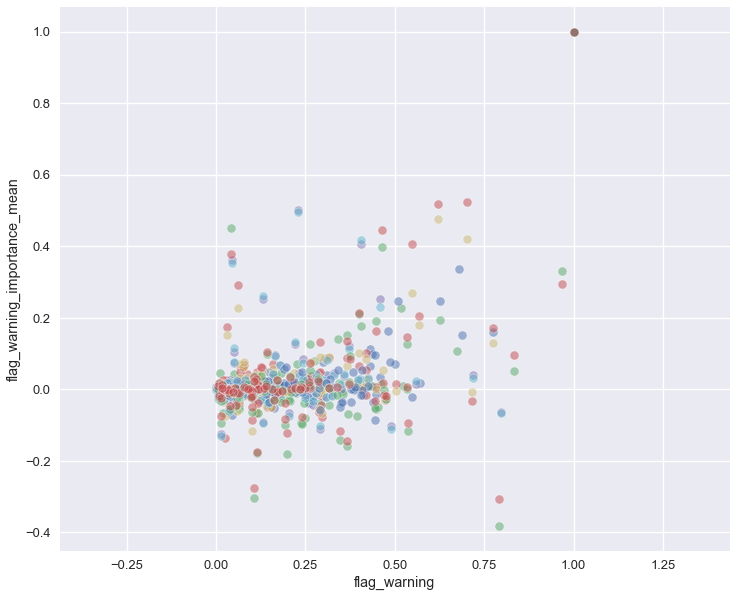

In [19]:
plt.figure(figsize=(12,10))
for correl_var in range(len(features_corr_imp_norm.columns)-9):
    sns.scatterplot(features_corr_imp_norm.iloc[:,correl_var],features_corr_imp_norm.iloc[:,correl_var+9], alpha=0.5)
plt.axis('equal')
# plt.axhline(0.01, color="gray", ls="--")
# plt.axvline(0.15, color="gray", ls="--")

In [14]:
distances={}
for correl_var in range(len(features_corr_imp_norm.columns)-9):
    feature_dist=[]
    feat_dist_df=features_corr_imp_norm.iloc[:,[correl_var,correl_var+9]]
    for predict in feat_dist_df.index:
        feature_dist.append(distance.euclidean(feat_dist_df.loc[predict,:],[0,0]))
    distances[features_corr_imp_norm.columns[correl_var]]=feature_dist

In [15]:
predictor_distances=pd.DataFrame(distances, index=features_corr_imp_norm.index)

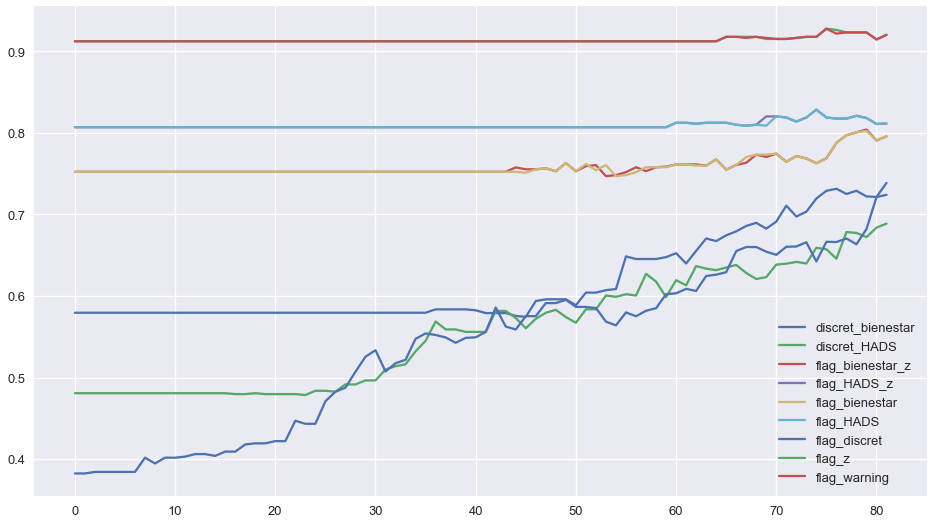

In [22]:
plt.figure(figsize=(16,9))
f1_scores={}
for criterio in predictor_distances.columns:
    regresiones_predictoras=predictor_distances[criterio].sort_values(ascending=True).index
    scores_criterio=[]
    for i in range(2,len(regresiones_predictoras)):
        X_train, X_test, y_train, y_test = train_test_split(
            features_x[list(regresiones_predictoras[:i])], 
            features_y[criterio],
            test_size=0.25, 
            random_state=183)
        logreg_clasif = LogisticRegression(random_state=183,max_iter=10000).fit(X_train, y_train)
        y_pred_logreg = logreg_clasif.predict(X_test)
        test_score_logreg=f1_score(y_test, y_pred_logreg, average='weighted')
        scores_criterio.append(test_score_logreg)
    
#     plt.scatter(x=range(len(scores_criterio)), y=scores_criterio,ls="--")
    plt.plot(scores_criterio, label=criterio)
    plt.legend()
#     plt.title(criterio)
#     plt.show()
    f1_scores[criterio]=scores_criterio


In [17]:
pd.DataFrame(f1_scores)

,discret_bienestar,discret_HADS,flag_bienestar_z,flag_HADS_z,flag_bienestar,flag_HADS,flag_discret,flag_z,flag_warning
0,0.579445,0.480769,0.752259,0.806923,0.752259,0.806923,0.382387,0.912263,0.912263
1,0.579445,0.480769,0.752259,0.806923,0.752259,0.806923,0.382387,0.912263,0.912263
2,0.579445,0.480769,0.752259,0.806923,0.752259,0.806923,0.384282,0.912263,0.912263
3,0.579445,0.480769,0.752259,0.806923,0.752259,0.806923,0.384282,0.912263,0.912263
4,0.579445,0.480769,0.752259,0.806923,0.752259,0.806923,0.384282,0.912263,0.912263
...,...,...,...,...,...,...,...,...,...
77,0.725061,0.678405,0.797040,0.817500,0.797040,0.817500,0.670454,0.923140,0.923140
78,0.728953,0.677313,0.800692,0.820917,0.800692,0.820917,0.663441,0.923140,0.923140
79,0.722060,0.672259,0.804067,0.818164,0.802413,0.818164,0.682032,0.923140,0.923140
80,0.721431,0.683736,0.790635,0.810883,0.790635,0.810883,0.721260,0.914495,0.914495
